# FIFA World Cup 

## Introduction

This analysis will use data for all FIFA World Cup Finals tournaments from 1930 through 2014.  The FIFA World Cup is played every four years.  It's a competition between the top countries in the FIFA regional conferences.  The analyses will provide high level descriptions of the tounament structure, host countries, and past winners.  It will also delve into deeper questions and trends using individual match data.

## The Data

I am going to be using two data sets.  

The first, "WorldCups.csv" includes information about the tournament itself.  It includes:
1. Year of Tournament
2. Host Country(s)
3. The Winner
4. Runner-up
5. 3rd place
6. 4th place
7. Total goals scored
8. Size of the field (qualified teams)
9. Matches played
10. Total attendance

The second, "WorldCupMatches.csv" includes individual match data.  Including:
1. Year
2. Date and time of match
3. Round (stage in the tournament)
4. City where match took place
5. Home team (determined by a random draw except for the host team)
6. Home team goals
7. Away team goals
6. Away team (determined by random draw)
7. Observation about the match (e.g. decided by penalty kicks)

With the exception of 13 data points for which team was designated as home or away in a given match.  The data is complete and consistent.



### Data Wrangling

After importing the WorldCups.csv file, I reviewed the data types, size, and some sample rows.  The data looks clean and consistent with no missing values for the years when the World Cup was played.

In [1]:
#Import modules
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import csv data into data frames
#This file contains information about all FIFA worlds cups e.g. year, location winner
dfCups = pd.read_csv('WorldCups.csv')


In [3]:
#Do a high-level review of the data
print(dfCups.shape)
print(dfCups.info())
print(dfCups.head(2))

(20, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB
None
   Year  Country   Winner      Runners-Up    Third      Fourth  GoalsScored  \
0  1930  Uruguay  Uruguay       Argentina      USA  Yugoslavia           70   
1  1934    Italy    Italy  Czechoslovakia  Germany     Austria           70   

   QualifiedTeams  MatchesPlayed Attendance  
0              13             18    590.549  
1              16             17    363.000  


The World Cup Matches data set includes over 3,000 empty rows.  I decided to drop those from the data frame to have the correct counts.  Once that was completed I once again reviewed the shape and info and found that there were a limited number of NaN values in 2 fields across 13 records.  Since this was relatively limited given a population of over 850 records, I decided to move forward with the analysis without further transformation of the underlying data.

There eas a need to create some additional fields to conduct specific analyses, but those details are contained in the respective analytic question section below.

In [4]:
#This file contains individual match information across all FIFA World Cup tournaments
dfMatches = pd.read_csv('WorldCupMatches.csv')

In [5]:
#Get a high-level sense of the imported data
print(dfMatches.shape)
print(dfMatches.info())
print(dfMatches.head(2))

(4572, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 10 columns):
Year           852 non-null float64
DateTime       852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       847 non-null object
HomeGoals      852 non-null float64
AwayGoals      852 non-null float64
AwayTeam       844 non-null object
Observation    852 non-null object
dtypes: float64(3), object(7)
memory usage: 357.3+ KB
None
     Year              DateTime    Round         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    

  HomeTeam  HomeGoals  AwayGoals AwayTeam Observation  
0   France        4.0        1.0   Mexico              
1      USA        3.0        0.0  Belgium              


In [6]:
#There are records where all fields are NaN, I want to drop those from the dfMatches
dfMatches=dfMatches.dropna(how='all')

In [7]:
#Check data again after transformation
print(dfMatches.shape)
print(dfMatches.info())
print(dfMatches.tail(2))

(852, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 10 columns):
Year           852 non-null float64
DateTime       852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       847 non-null object
HomeGoals      852 non-null float64
AwayGoals      852 non-null float64
AwayTeam       844 non-null object
Observation    852 non-null object
dtypes: float64(3), object(7)
memory usage: 73.2+ KB
None
       Year              DateTime                     Round  \
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   

                 Stadium             City HomeTeam  HomeGoals  AwayGoals  \
850     Estadio Nacional        Brasilia    Brazil        0.0        3.0   
851  Estadio do Maracana  Rio De Janeiro   Germany        1.0        0.0   

        AwayTeam                    Observation  
850  

In [8]:
#Review records where there are Nulls, small number so moving forward
dfMatches[dfMatches['HomeTeam'].isnull()]

,Year,DateTime,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
108,1958.0,08 Jun 1958 - 19:00,Group 1,Orjans Vall,Halmstad,NaN,1.0,0.0,Czechoslovakia,
126,1958.0,17 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,NaN,2.0,1.0,Czechoslovakia,Northern Ireland win after extra time
343,1982.0,25 Jun 1982 - 21:00,Group 5,Luis Casanova,Valencia,NaN,1.0,0.0,Spain,
378,1986.0,07 Jun 1986 - 12:00,Group D,Tres de Marzo,Guadalajara,NaN,1.0,2.0,Spain,
392,1986.0,12 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,NaN,0.0,3.0,Brazil,


In [9]:
#Review records where there are Nulls, small number so moving forward
dfMatches[dfMatches['AwayTeam'].isnull()]

,Year,DateTime,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
115,1958.0,11 Jun 1958 - 19:00,Group 1,Orjans Vall,Halmstad,Argentina,3.0,1.0,NaN,
119,1958.0,15 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Germany FR,2.0,2.0,NaN,
131,1958.0,19 Jun 1958 - 19:00,Quarter-finals,Idrottsparken,Norrk�Ping,France,4.0,0.0,NaN,
319,1982.0,17 Jun 1982 - 21:00,Group 5,La Romareda,Zaragoza,Yugoslavia,0.0,0.0,NaN,
331,1982.0,21 Jun 1982 - 21:00,Group 5,La Romareda,Zaragoza,Honduras,1.0,1.0,NaN,
348,1982.0,01 Jul 1982 - 17:15,Group 4,Vicente Calderon,Madrid,Austria,2.0,2.0,NaN,
352,1982.0,04 Jul 1982 - 17:15,Group 4,Vicente Calderon,Madrid,France,4.0,1.0,NaN,
366,1986.0,03 Jun 1986 - 12:00,Group D,Tres de Marzo,Guadalajara,Algeria,1.0,1.0,NaN,


## Analytics Questions
### 1. How has the size of the field evolved over time?

The tournament has taken place every four years since the first contest in Uruguay in 1930.  There were two exceptions to this in 1942 and 1946 due to World War II.  To account for that, before analyzing the size of the field, I added the missing years and corresponding qualified teams (zero for both those years).

The bar char below shows that there was some inconsistency in the early years of the tournament with the field going from 13 to 16, then 15 and back to 13 in 1950.  After that the tournament format settled on 16 teams through the 1970s.  For the tournament in Spain in 1982, the field expanded to 24 teams and then again to 32 teams for the 1998 tournament in France.

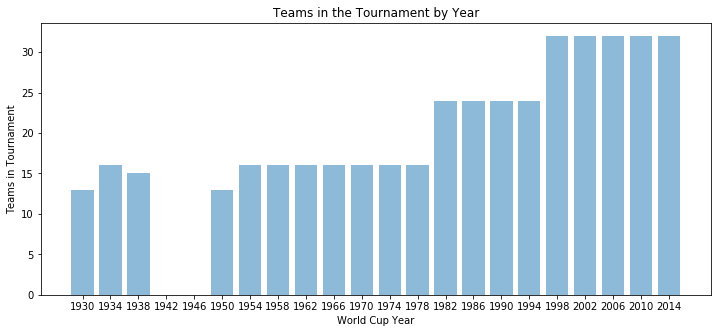

In [10]:
#Get a sense for how the tournament has evolved over the years as it relates to size of field

#Need to account for the years that WC was suspended during World War II
years = list(dfCups['Year'])
years.insert(3,1942)
years.insert(4,1946)

teams = list(dfCups['QualifiedTeams'])
teams.insert(3,0)
teams.insert(4,0)

y_pos = np.arange(len(years))

plt.figure(figsize=(12,5))
plt.bar(y_pos, teams, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Teams in Tournament')
plt.xlabel('World Cup Year')
plt.title('Teams in the Tournament by Year')
plt.show()

### 2. Where has the tournament been held?
It is said that FIFA World Cup is the most popular sporting event in the world.  The nations that host the tournament make significant investments in infrastructure and benefit from tourism, economic activity and an opportunity to showcase their country on the world stage.  

The bar char below shows that the tournament has been held in 15 countries across the 20 times it's been played.  Four countries - Brazil, France, Germany and Mexico - have hosted the tournament twice.  Korea and Japan co-hosted the tournament in 2002.  The Americas have hosted 8 times, European countries 10 times, Asia and Africa one each.

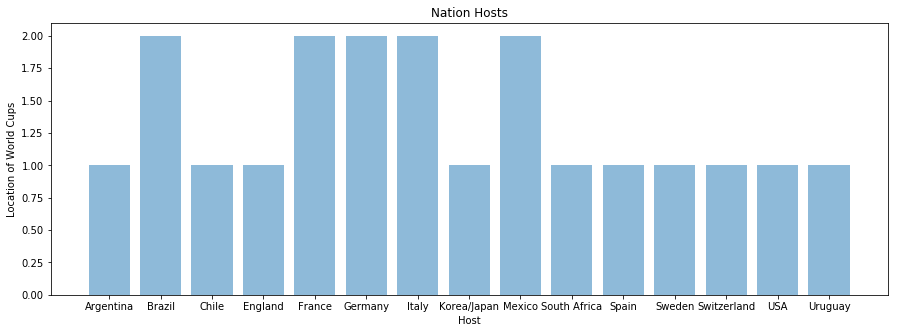

In [11]:
#Get a sense for where the tournament has been held
dfLocation=pd.DataFrame
dfLocation=dfCups.groupby('Country').count()

host = list(dfLocation.index)
host_instance = list(dfLocation['Year'])

y_pos = np.arange(len(host))

plt.figure(figsize=(15,5))
plt.bar(y_pos, host_instance, align='center', alpha=0.5)
plt.xticks(y_pos, host)
plt.ylabel('Location of World Cups')
plt.xlabel('Host')
plt.title('Nation Hosts')
plt.show()

### 3. Which countries have won the tournament?
Over the 20 times the tournament has been played, only 8 countries have been crowned champions.  Brazil holds the record with 5 World Cup wins, followed by Italy and Germany** with 4.

**Germany won 3 of it's titles during the Cold War as the German Federal Republic, or West Germany.  After re-unification in the 1990s, they went on to win a 4th title.  It is commonly accepted, however that Germany has won the tournament 4 times even though 3 of those, it did so officially as West Germany.  Latin American countries have won the tournament 9 times and European countries 11 times.

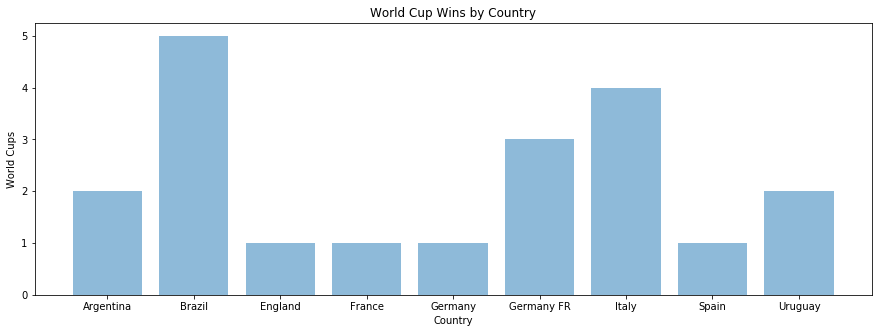

In [12]:
#Look at who has won the tournament
dfWinners=pd.DataFrame
dfWinners=dfCups.groupby('Winner').count()

winner = list(dfWinners.index)
winner_instance = list(dfWinners['Year'])

y_pos = np.arange(len(winner))

plt.figure(figsize=(15,5))
plt.bar(y_pos, winner_instance, align='center', alpha=0.5)
plt.xticks(y_pos, winner)
plt.ylabel('World Cups')
plt.xlabel('Country')
plt.title('World Cup Wins by Country')
plt.show()

### 4. Have match scores and spreads remained consistent?
It would be interesting to understand whether over the 20 instances the tournament has been played, the competitiveness of the field has evolved.  To understand this better, I graphed the score of the home team, away team and the goal differential across all matches.  To do this, it was necessary to create a new field to capture the goal differential.

It's interesting to see how much closer games have gotten over time.  The mean of goal differential by tournament year, shows a clear downward trend.  It also appears that the designated "Home" team in a given match, used to score significantly more goals on average than the "Away" team in the early years of the tournament.  This may be driven by the fact that the field was smaller so the true "Home" team (the host country) was having a more significant impact on the average.  Interestingly, the away team average goals, have remained pretty consistent throughout the years.

In [13]:
#Need to create a field to capture who won the game as well as goal differential

goal_diff=[]
winner=[]


for index, row in dfMatches.iterrows():
    goal_diff.append(abs(row['HomeGoals']-row['AwayGoals']))
    if row['HomeGoals'] > row['AwayGoals']:
        winner.append(row['HomeTeam'])
    elif row['HomeGoals'] < row['AwayGoals']:
        winner.append(row['AwayTeam'])
    else:
        winner.append('Tie')        


dfMatches['GoalDiff'] = goal_diff
dfMatches['Winner'] = winner

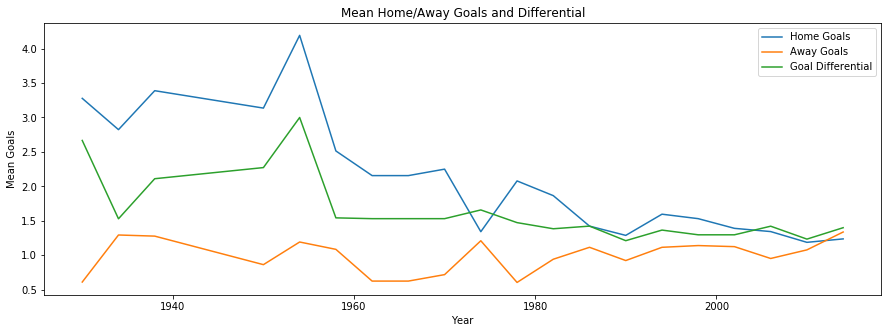

In [14]:
#Have matches been getting more competitive by looking at average goals by home and away teams as well as goal diff

plt.figure(figsize=(15,5))
plt.plot(dfMatches.groupby('Year').aggregate(np.mean))
plt.legend(['Home Goals','Away Goals','Goal Differential'])

plt.ylabel('Mean Goals')
plt.xlabel('Year')
plt.title('Mean Home/Away Goals and Differential')

plt.show()

### 5. Whats the distribution of goal differential?
I wanted to understand, across all available match data, by how many goals did the winning team win by.  The histogram below shows that the vast majority of matches (334) were won by 1 goal. 172 were won by 2, 88 by 3 and only a handful by more than that.  3 matches were won by 9 goals.  For two of those the winner was Hungary, once in 1954 against Korea and again in 1982 against El Salvador.

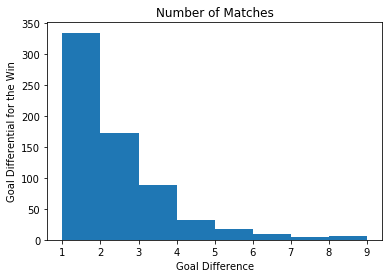

In [15]:
dfMatches.max()

plt.hist(dfMatches.loc[lambda dfMatches: dfMatches['GoalDiff']>0, :]['GoalDiff'], bins=8)

plt.ylabel('Goal Differential for the Win')
plt.xlabel('Goal Difference')
plt.title('Number of Matches')

plt.show()

In [16]:
#What matches make up the 9 goal buckes
dfMatches.loc[lambda dfMatches: dfMatches['GoalDiff']>8, :]

,Year,DateTime,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,GoalDiff,Winner
80,1954.0,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9.0,0.0,Korea Republic,,9.0,Hungary
243,1974.0,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9.0,0.0,Zaire,,9.0,Yugoslavia
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10.0,1.0,El Salvador,,9.0,Hungary


### 6. Is there an advantage to being the "Home" team?
In every World Cup there's only one true "home" team and that's the host.  All other matches have the "home" "away" designations determined by a random draw.  My understanding based on the research I did, is that the only "home" advantage amounts to the "home" team wearing the jersey they want and the "away" team - potentially - having to wear a different jersey officials believe similarities could lead to confusion.

Given the "home" advantage is relatively trivial outside of the host nation, it was interesting to see that close to 60% of matches in all World Cups are won by the designated "home" team.  For this analysis I did not control for the fact that in every tournament there is one true "home" team that could be benefiting from crowd support or increased familirity with field or climate - so that will skew the data.  While this is likely inflating the number, an almost 3:1 ratio in "home" wins vs. "away" could not be explained by that.  Could jersey used have an impact?  Further analysis is required, which could include a review of historical rules as it may be that in the past, there was more to the "home" vs. "away" designation than a random draw (e.g. tournament seed).

In [17]:
#Is there an advantage to being the home-team

HomeOrAway=[]

for index, row in dfMatches.iterrows():
    if row['Winner'] == row['HomeTeam']:
        HomeOrAway.append('Home')
    elif row['Winner'] == row['AwayTeam']:
        HomeOrAway.append('Away')
    else:
        HomeOrAway.append('Tie')
        
dfMatches['HomeOrAway'] = HomeOrAway

In [18]:
dfHomeAway = pd.DataFrame
dfHomeAway = dfMatches['HomeOrAway'].value_counts()
dfHomeAway



Home    485
Tie     193
Away    174
Name: HomeOrAway, dtype: int64

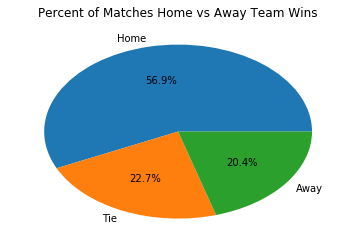

In [19]:
label = []
for item in (dfHomeAway.index):
    label.append(item)
    
plt.pie(dfHomeAway, labels=label, autopct='%1.1f%%')
plt.title('Percent of Matches Home vs Away Team Wins')
plt.show()



### 7. Are ties more prevalent when elimination is not necessarily on the line?
The way the tournament is structured is as follows:

In the first round, or group round, there is a round robin style competition in which the top teams in each group  (top two since 1982) advance in the tournament.  What this means is that a team doesn't need to win all matches to move on, sometimes a tie or even a loss can still mean advancing.  What matters is the relative performance against other teams in a given group.  During this group stage, a team that wins a match is awared 3 points, a tied yields 1 point and a loss no points.

Beyond the first round of the tournament however, it is an elimination style competition - you have to win to advance.  In the elimination round, if after the 90 minutes of regulation have expired, the score is tied, there will be two additional 15 minute halves to see if the tie can be broken.  If it cannot, the game will be decided by penality kicks.  Interestingly, if a game is decided in this fashion, the official result is a tie.

Given that officially a game can be tied in the elimination round, I wanted to test whether the "do-or-die" nature of elimination round, would result in a different incidence of ties than in the first round, when a tie can still mean a team will move forward.  

In the bar chart below, we see that 25% of group round matches end in a tie, whereas only 15% of matches end in a tie (i.e. decides by penalty kicks) in the elimination rounds.  There is noise in this data because the population are not exactly the same as games in the elimination round get an additional 30 minutes to break a potentialy tie before it goes to penalty kicks.  Controlling for that would be an interesting follow on analysis.  It is also possible that the rules have changed in more recent tournaments, and that earlier World Cups in the sample, structured the rounds and extra time differently.

In [20]:
#games in elimination rounds that end in ties, vs, ties in non elimination rounds

#Preliminary Rounds
searchfor = ['Group', 'round']
dfGroupStageTies = pd.DataFrame


dfGroupStageTies = dfMatches.loc[lambda dfMatches: dfMatches['Round'].str.contains('|'.join(searchfor)), :]['HomeOrAway'].value_counts()

GroupStagePercentTies = (dfGroupStageTies.loc['Tie']/(dfGroupStageTies.loc['Home']+dfGroupStageTies.loc['Away']+dfGroupStageTies.loc['Tie']))*100


In [21]:
#Elimination Rounds
dfEliminationStageTies = pd.DataFrame
dfEliminationStageTies = dfMatches.loc[lambda dfMatches: ~dfMatches['Round'].str.contains('|'.join(searchfor)), :]['HomeOrAway'].value_counts()

EliminationStagePercentTies = (dfEliminationStageTies.loc['Tie']/(dfEliminationStageTies.loc['Home']+dfEliminationStageTies.loc['Away']+dfEliminationStageTies.loc['Tie']))*100



In [22]:
dicTieIncidence ={'Group Stage':GroupStagePercentTies,
                  'Elimination Stage':EliminationStagePercentTies}



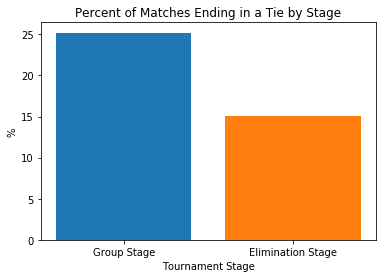

In [23]:
#Graph the percentage of games that end in ties in group stage vs elimination portion of tournament
names = list(dicTieIncidence.keys())
values = list(dicTieIncidence.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.xticks(range(0,2),names)

plt.ylabel('%')
plt.xlabel('Tournament Stage')
plt.title('Percent of Matches Ending in a Tie by Stage')

plt.show()